# This example demonstrate how to train region classification (standart image classification model).

In [1]:
# Specify device
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 
# os.environ["CUDA_VISIBLE_DEVICES"] = ""  # For CPU inference
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

In [2]:
import os
import sys
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

# Nomeroff-Net path
NOMEROFF_NET_DIR = os.path.abspath('../')
sys.path.append(NOMEROFF_NET_DIR)

In [3]:
plt.rcParams["figure.figsize"] = (10, 10)

In [4]:
%matplotlib inline 

In [5]:
# auto download latest dataset
from nomeroff_net.tools import modelhub

# auto download latest dataset
info = modelhub.download_dataset_for_model("numberplate_options")
PATH_TO_DATASET = info["dataset_path"]
PATH_TO_REG_CUSTOM_DATASET = f'{PATH_TO_DATASET}_custom_reg'
PATH_TO_LINE_CUSTOM_DATASET = f'{PATH_TO_DATASET}_custom_line'

# local path dataset
#PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "./data/dataset/OptionsDetector/numberplate_options_example")

In [6]:
PATH_TO_DATASET

'/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25'

In [7]:
PATH_TO_REG_CUSTOM_DATASET

'/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg'

In [8]:
PATH_TO_LINE_CUSTOM_DATASET

'/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line'

In [9]:
DATASET_NAME = "options"
VERSION = "2021_12_16_uacustom_pytorch_lightning"

RESULT_PATH = os.path.join(NOMEROFF_NET_DIR, "./data/models/", 'numberplate_{}_{}.ckpt'.format(DATASET_NAME, VERSION))

In [11]:
from nomeroff_net.tools import custom_options
from nomeroff_net import OptionsDetector

class_region_custom = [
    "eu-ua-2015",
    "eu-ua-2004",
    "eu-ua-1995",
    "eu",
    "xx-transit",
    "eu-ua-ordlo-dpr",
    "eu-ua-ordlo-lpr",
    "ge",
    "su"
]

class_count_lines_custom = ["1", "2", "3"]

state_ids_only_labels = ["not filled"]

customOptionsMakerReg = custom_options.CustomOptionsMaker(
    PATH_TO_DATASET,
    PATH_TO_REG_CUSTOM_DATASET, 
    OptionsDetector.get_class_region_all(),
    class_region_custom,
    OptionsDetector.get_class_count_lines_all(),
    class_count_lines_custom,
    OptionsDetector.get_class_state_all(),
    state_ids_only_labels
)

customOptionsMakerCountLine = custom_options.CustomOptionsMaker(
    PATH_TO_DATASET,
    PATH_TO_LINE_CUSTOM_DATASET, 
    OptionsDetector.get_class_region_all(),
    class_region_custom,
    OptionsDetector.get_class_count_lines_all(),
    class_count_lines_custom,
    OptionsDetector.get_class_state_all(),
    state_ids_only_labels,
    items_per_class = 3000
)

In [12]:
customOptionsMakerCountLine.make()

Creating path "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line" for custom options
dir: /mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25 option_dir: train custom_options_sub_dirs[0]: ann
Labels stat for /mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25/train/ann
[((2, 14), 5145), ((0, '0'), 3960), (('1', '13'), 3088), ((1, '1'), 2597), ((1, '2'), 2434), ((1, '4'), 2298), (('1', '11'), 2025), ((1, '3'), 2020), (('1', '14'), 2017), (('1', '5'), 1743), ((1, '6'), 1707), (('2', '6'), 1664), ((1, '7'), 1639), ((1, '12'), 1616), (('1', 10), 1503), (('2', '1'), 1112), (('2', '11'), 1064), (('1', '10'), 1015), (('2', '10'), 975), (('1', '12'), 851), ((1, '5'), 830), (('2', 14), 814), ((1, 16), 733), ((

In [13]:
customOptionsMakerReg.make()

Creating path "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg" for custom options
dir: /mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25 option_dir: train custom_options_sub_dirs[0]: ann
Labels stat for /mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25/train/ann
[((2, 14), 5145), ((0, '0'), 3960), (('1', '13'), 3088), ((1, '1'), 2597), ((1, '2'), 2434), ((1, '4'), 2298), (('1', '11'), 2025), ((1, '3'), 2020), (('1', '14'), 2017), (('1', '5'), 1743), ((1, '6'), 1707), (('2', '6'), 1664), ((1, '7'), 1639), ((1, '12'), 1616), (('1', 10), 1503), (('2', '1'), 1112), (('2', '11'), 1064), (('1', '10'), 1015), (('2', '10'), 975), (('1', '12'), 851), ((1, '5'), 830), (('2', 14), 814), ((1, 16), 733), ((2

In [14]:
customOptionsMakerReg.rebalance_regions('train', with_aug=True, rebalance_suffix="rebalanced_regionss", verbose=True)
customOptionsMakerCountLine.rebalance_count_lines('train', with_aug=True, rebalance_suffix="rebalanced_count_lines", verbose=True)

Prepare data for region_id: 3
Crop class region_id 3 to 2000
Prepare data for region_id: 2
Crop class region_id 2 to 2000
Prepare data for region_id: 8
Crop class region_id 8 to 2000
Prepare data for region_id: 7
Crop class region_id 7 to 2000
Prepare data for region_id: 4
Crop class region_id 4 to 2000
Prepare data for region_id: 0
Crop class region_id 0 to 2000
Prepare data for region_id: 1
Crop class region_id 1 to 2000
Prepare data for region_id: 6
Increase class region_id 6 from 255 to 2000
Multiply 255 class data in 7 times and add random 215 items of class
Make full copy for index 1
Try make duplicate/augmentation for 255 items
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_5179-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptions

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_4741-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_4155-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_gwMf0Al2DrXd8Qpa5ZnyIs7PCibOheqFVESzWG3vtLjB9Nu1mJ.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_XcugS2kdtli0E6Vfnr4ZvOem7DzoUHWaFMpYKjP1GL3h5yJQNT.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./data

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_rl4YdfM62oqm3A8wFjeQnxbyRD7GvsJI5TZPOuXKSzg1kUhNa0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_5985-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_VSLbCajDu1iUP203IzfR8wyYkBn6Xge74pxqTlNOJcZMFQtAGo.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_orO6cizvMVuFKTPsg8qe3SYZlb7k9CXxjEBwImn2UL51yDNQJp.png"
Make augmented file: "/mnt/store/nomeroff-n

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_o0eEQNu7blvUfskdwrD3GXaxKIinOzZjV9gSTHW8cthPyB5JMm.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_B3G2Ke7T8oIE0qYaXZuMysPLVgk5Dm96iS1jHrQWRdzbfUAFNO.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_3670-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_I8oDPCTn3NK4pqLh569Gxrj2F17OcRzJwYlUtvBg0imfdHbSyZ.png"
Make augmented file: "/mnt/store/nomeroff-n

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_qtN6XeWRE9UvDjFKO5mgfhs43nbTdzQ7kp1JPMxCwZ0luSLVcY.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_uL2P7NZ5SU6vsIMcHD0WtBQ3ijYGlCm41wAkEKyTdfxgRJz8eh.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_7IFTCd6L4AMPsUD92uheHy5S0crkwo1EBKGOZxWqpga8XY3QbJ.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_7116-main_0.png"
Make augmented file: "/mnt/store/nomeroff-n

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_zoRlAM2xj7utCebEOdUv1gfaHwS04GkcVhpI5TFnXqi68Km3YN.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_6978-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_GndUlKCTsF85mR3IbBDHj6wqVExa1LvrWZ9oiufPkchezYpyXJ.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_8HwsqZvMubW7zIO6Ue3Gjdc2PhfF9XkyLRnNA4JKBmD1EptYQS.png"
Make augmented file: "/mnt/store/nomeroff-n

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_3905-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_5R9ofAhmGv3Dgd0uskLzYFX6n4I1bTxcCjUt8ByHrNKVEiPpWq.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_7551-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_7711-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_f8zRVKFkHrjmyDhxw6SIb731Z4peqlE9onQPvCMgJY5sLX2UuO.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_4604-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_dqE283fFcaN0ljmSwskT1JntixP4hyBGzegWULMRDOb6vYICK9.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_Zn5LYu8EQi6JHqIR9pcCtgxy1Dm3vTsMPVklfKXbSdhNGrwA7B.png"
Make augmented file: "/mnt/store/nomeroff-n

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_I8oDPCTn3NK4pqLh569Gxrj2F17OcRzJwYlUtvBg0imfdHbSyZ.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_nyF8GqK694jv2YrVmhpslCXLWcUz1DfZtI0T3aiOPHxu5JNQBe.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_k4gSV3uyd7tFTImhazvfZnw1GArolcXUN6CsWE8qH20Be9pOjM.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_4274-main_0.png"
Make augmented file: "/mnt/store/nomeroff-n

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_OeurbMZ3Vx1QPkoB8jEd0c95XUzLGp2a7AhSvwCNJHfKW6tFRm.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_3495-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_3401-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_3664-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_11281-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_nZMRIDbE0WVgaTt6Kzvdls2H7POCiAYuo9kJN3m1x5yFcB8GhL.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_kZ40ugoLbHqJwYXa1c7O5pMIN32dePx9FvEDhntmUGTQCVsSrK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_5caOHCJXbKxq8zZIfo4Tl6Rn2rmSeLBWDisYkygtAEd9M7F3V1.png"
Make augmented file: "/mnt/store/nomeroff-

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_3411-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_7081-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_mOMgxWkn2BhjPYpifyzNQqrAc7GDTaIseboVFd1EuRCSXJ6vl9.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_3905-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_tdMHf1WgnAGZBV5cF4JDYXqIhbz73iTowSKveRLrP0NCUslE2x.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_KT9Y7oaImePfUkStNDFnZv1wrG2QV54MujE3chBgLbJXq0ClRd.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_AyFKrTgC3Yk86WNndzLlZJIEDaGBvQ0mtUpiSVs5hRfOo4jecP.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_PaQEBRsyOrkGATx39qYvelD4uNfpzVtCFm6diIMXK0SZL57nHh.png"
Make

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_rFc0EPpzleqZ9N45ya83HDxiJTYbd6gmukBjA12sQWKMf7IoXL.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_njHUiNWF6sCDl7K3GwoxYETPk9fhtSy0vbXOMdLZJgpA8emqBQ.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_4439-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_RTjXCPJIilV0ApGtFWBvsKHOM2EZD4YbqNkzr6am1358cdxLSo.png"
Make augmented file: "/mnt/store/nomeroff-n

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_rkVdKRi3hJjf0eLzTUDG74PbwXWpnclx5CaI1uHEQqOS6YtmvZ.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_Adl4jMzxIpF1DQNscbu97XkYWaKwheLqrRPEJ0BCU8nyVS32Tt.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_4288-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_LjXRpF94hcbQmtdNIrlDwUAS51ekVTgYGKiaW3uzoC6OH827yJ.png"
Make augmented file: "/mnt/store/nomeroff-n

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_3783-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_ZJFakiQSdOW0wUsfhARC4Kbo6YtBgGDevI158qcPrMpyN7TuX9.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_ehsvCna1JGV7O6PU4uzFDyMrfqgi3SNkj0pTtIoRE9mw8K5AQL.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_h6Tr4GCVEeuFOfs1maRolp78MJi0zqK2ANWScHg5jBxn3PQYIU.png"
Make augmented file: "/mnt/store/nomeroff-n

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_nV1ZfBry8stN7gDbHiQL3S6MhjICGauPl4WUKFwOXYzmoRTk2x.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_d9p6kEFvcAf1IZLNbu85rtUWVyHziKh3DwagoxRJCXeMnSTY2q.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_rl4YdfM62oqm3A8wFjeQnxbyRD7GvsJI5TZPOuXKSzg1kUhNa0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_5985-main_0.png"
Make augmented file: "/mnt/store/nomeroff-n

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_3490-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_4072-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_zTVftcXGj1kwDdQZeb4nK85yI7CuUBJhWYOaNr2qSvRigMp3PE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_4101-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_uL2P7NZ5SU6vsIMcHD0WtBQ3ijYGlCm41wAkEKyTdfxgRJz8eh.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_7IFTCd6L4AMPsUD92uheHy5S0crkwo1EBKGOZxWqpga8XY3QbJ.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_7116-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_5X9s61UaMdRZ3FTNDBEoSPtQqlA8LJwhf7izIpjmnYWVb4OcC2.png"
Make augmented file: "/mnt/store/nomeroff-n

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_5_Ur9w0QfZmlpF1CbuaOTGozk7cLvY8XqyxEdhiKM4ItjHWBJN63.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_5_2751-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_5_i9Uz8AcBuJOy3j0eCdXSRKPfH7FvslboqN2IkDaLw1Vgm5pErG.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_5_tW4ecygHZVS7RnzDw5a9Ad3K18P2JO0BmlkQbFMupiYXoChj6I.png"
Make augmented file: "/mnt/store/nomeroff-n

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_5_8v2CwgQEbFYSIjeq3f1kmALHWPR60BUcspiJGVx4rn5yatXlNd.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_5_3411-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_5_7081-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_5_mOMgxWkn2BhjPYpifyzNQqrAc7GDTaIseboVFd1EuRCSXJ6vl9.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./data

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_5_KT9Y7oaImePfUkStNDFnZv1wrG2QV54MujE3chBgLbJXq0ClRd.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_5_AyFKrTgC3Yk86WNndzLlZJIEDaGBvQ0mtUpiSVs5hRfOo4jecP.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_5_PaQEBRsyOrkGATx39qYvelD4uNfpzVtCFm6diIMXK0SZL57nHh.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_5_Rmy0Z7f2lSszD1AoYbhBkpVHFgGxQIMJULjtNwK54WqXOE89dr.png"
Make

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_5_7208-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_5_dop1ZTRuhI3A7xYb0CwQMKGqS9ONn5WeyHscXJBUPmvj2ftlzk.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_5_4245-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_5_rFc0EPpzleqZ9N45ya83HDxiJTYbd6gmukBjA12sQWKMf7IoXL.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./data

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_5_OeurbMZ3Vx1QPkoB8jEd0c95XUzLGp2a7AhSvwCNJHfKW6tFRm.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_5_3495-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_5_3401-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_5_3664-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_6_hdpY2LGzUnf9F7ce4TV8A0rHliDvx3oyJaXq5C6wIkjtNusEmB.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_6_LbXPsQKGt6AFi0dBOgEx2NkqelVc3vM4aTwWRunmY7opCZJ5Dz.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_6_VgQzPvYROdyGlTISi43BMJbherEUZFNpnuwmLa7kCojfWtcHxX.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_6_e4gCTo5O6ZRSIhxyw7k0qsprXQcvM1B2V3aNWuJAEzLYtmnUbf.png"
Make

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_6_xPoratviVnH9Rjz5NOXG71wplyc6WA2SDKeMbTE4YQm80BUIs3.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_6_WPE0FHLkq1AfvKaloy7beJMiDr9UcBw6SCOYmjz8xun3tT25Rh.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_6_WCQK9mzJcuZsLwIA2vgVnoR8fyGDt3PxljrOeXdFSNE4kba175.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_6_X91eF03wKcEWIxtylq6GUhYjBSRM2nHTOCu4zvZsgi8abPD5mQ.png"
Make

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_6_AyFKrTgC3Yk86WNndzLlZJIEDaGBvQ0mtUpiSVs5hRfOo4jecP.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_6_PaQEBRsyOrkGATx39qYvelD4uNfpzVtCFm6diIMXK0SZL57nHh.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_6_Rmy0Z7f2lSszD1AoYbhBkpVHFgGxQIMJULjtNwK54WqXOE89dr.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_6_6197-main_0.png"
Make augmented file: "/mnt/store/nomeroff-n

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_6_6XIcYtrpeSVlwoxLQyuhKHP3FvZDkjaTNB8qUbWGf5401OJCgR.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_6_7208-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_6_dop1ZTRuhI3A7xYb0CwQMKGqS9ONn5WeyHscXJBUPmvj2ftlzk.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_6_4245-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./data

Add appendix (215 items) for index 7
Try make duplicate/augmentation for 215 items
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_7_b9XTkEzx87wNZMDiuLvRpUdstyS0oKmY3lO2I6nqr1WBHchgjf.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_7_4481-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_7_OeurbMZ3Vx1QPkoB8jEd0c95XUzLGp2a7AhSvwCNJHfKW6tFRm.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_7_6013-main_0.png"

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_7_Zn5LYu8EQi6JHqIR9pcCtgxy1Dm3vTsMPVklfKXbSdhNGrwA7B.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_7_mDpiBhtHx9P2sWnTcRYNudA4zI3aZoGO8VUgCQEKlJkSjMF15w.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_7_3885-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_7_6897-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./data

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_7_1iDCVNFhwvuBtmWUaHgZAs0dIR5Oj6zMXl47KkGpf9obrqcQEY.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_7_WCQK9mzJcuZsLwIA2vgVnoR8fyGDt3PxljrOeXdFSNE4kba175.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_7_RvozyuS62fcYBwkMTpWbVnrxstZ4ihDK30e7UXl91NIg5mGjHF.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_7_a2HoJ975TfP4tqgLW6FOzGrAjXQDivebxVmnwclCpZIU0YMudB.png"
Make

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_7_78a495e3dfDJHA6XYPyQWwrlv2OpVGBbhmnsRgFLSkj1MxzUc0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_7_w82Zso0Rtglk6IHN7chqiB9jJbV1DmrnPxE5TfWzALuQ3SyeUF.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_7_orO6cizvMVuFKTPsg8qe3SYZlb7k9CXxjEBwImn2UL51yDNQJp.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_7_pdP3bhuYoFmUZBSGNzyD1xnC8VcEeg76I4MfRAaLwqWlrsXvJO.png"
Make

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_3HPxiTaCuytvA29kbpYFE87Rr0JcXwjI1GUsfmeqMBlzZhO6gV.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_eAqJ5rUjHbgWun7toF9fDcQaSphTiCY2OyIRwP6EzL3k08XlvM.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_13142-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_KM0vV3wF9nRlODQWeUa4J7pBYP5xLcNI8TzoChg61bdimSkGXy.png"
Make augmented file: "/mnt/store/nomeroff-

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_RiTJbNOkjSKWsXz3d1loqwEIg0fvZHxCu4L6eY9MFcyt78hGAr.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_FmMzrqGfClbtj5UvRNykiSd0YV2IJW6OT3aoeAPBgX8us7xZQn.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_CjWMsmO496hKURViZdt1yNTcEk3SXfIGH8qanwDb2zv5BPQruA.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_VMndut9LC6sWoEDcfNPR8lz1qiOQxmSAgJpKHjvkb5w3e0Gr2Y.png"
Make

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_3NYS2J4OaKIAx0ozFj7XbBUfuQtikGWqDLTsr8vmlhRdyM5wEC.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_12319-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_deBGq4RtgiF0wW3VNo7PO1MICxUc8s56DrAJaYnu2vSbhylKLk.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_7xok2qcTXH8fJZgV4eGWIpA6hnS53awrdMbit9DNFP0vLKUROQ.png"
Make augmented file: "/mnt/store/nomeroff-

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_13229-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_9DZVOhyR0fumj75TJckSMnAFirQbpzoYw1NGxvUsCgEWXedaBH.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_12750-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_vOtH97FEPs3qUdRJ80ZMLl1GkzaDy2f4cpNxwSbIXgr5jiTCBK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./da

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_QENPjlrKYhAUCX6Op79JFzdByMZVo0LaDfGsgWvu2Hwc1tkTmi.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_FjDa0yipJShXKbevgIZm6G97ETHWoxrsfLwkUR8dzqYOPQuN2M.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_zqx6ihZyrOdbv5DFN0t4wSBaXLuHj7Ksl1mfgPoGI8CkcAe9QU.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_XQRMjtDWTua24nyNPSJ0YOismK5bAdhfx87BL6ZqI1eHzkwgGr.png"
Make

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_oBm1WXKhykVCg5eYxiPtEq9UD604Msv8jFf3QROanJpIlbzLAG.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_11329-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_10347-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_10307-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_opti

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_VEWw54qLptOSsTHNYMJZPa73fm9Qyr1uegDGvbCRnX0diK8hFc.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_GAiIPwF2kQxqSV43X8aosdnNJMUzghlKCepH90mt7cu6ZvOL5D.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_12245-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_JD2aQHgcP7UX6T0E4NWMm1jzGZusfbYpOhACwLo9ktKxiqyeRI.png"
Make augmented file: "/mnt/store/nomeroff-

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_xgmoFZviIfu6zbp891XWG7eVqPHlLsOUYjcS4JD0NtAanKrBR5.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_13121-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_9860-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_2TO4MKR3YEcpQdVkrvzWoHCJwmZbUulfni05gyBaqxj7XN8eGP.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dat

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_12368-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_VMb6pLXmPxEjrGIAy9O7iUK3g4NRT0fJzkaSv5B8nFlecDYCuo.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_TcltsFbd5fnLCAqH0NiGMzo2DvS8YXaIy1mhrg3P97BpKEQRZ6.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_10396-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./da

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_GLPlvxcaIW4g9f2jTJ8zRmdZrYAFqowiNKuXQt1OVHMUpCseD3.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_PvAwtG1VyMiknTa9pb8RCxWjE36dYQq7KSZLusJrI45goehDzf.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_H76ob0U9XMex3NDFLnfvrzyqAm1Wg2VcTJjElB5GPakhdK4QiC.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_1_10349-main_0.png"
Make augmented file: "/mnt/store/nomeroff-

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_Kpk8zNBVXI6EgCMau9eyxnAJObFSYvr5UZDdslTiHcWw3QqmfL.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_DHSfR0Wv28mpr9KFEgJcVCYsZiyUkBed3Mq76wzIhLnQaPTX5o.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_11961-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_10078-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./da

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_xt6SojHzXpbNqPcdZmDBC0Ofyi3GvlKM9AJERnVeWk45F8rh1w.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_0b4ZPqHDuQCKUMX8VWs6wnxkBNdFy39OEgmLvI1porJaet5j7l.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_vuPR3oAiFqWLNS9rZ0jYGcxmzwkXt62aBelypUTV8fhCEHn14I.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_13344-main_0.png"
Make augmented file: "/mnt/store/nomeroff-

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_13229-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_9DZVOhyR0fumj75TJckSMnAFirQbpzoYw1NGxvUsCgEWXedaBH.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_12750-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_vOtH97FEPs3qUdRJ80ZMLl1GkzaDy2f4cpNxwSbIXgr5jiTCBK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./da

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_zqx6ihZyrOdbv5DFN0t4wSBaXLuHj7Ksl1mfgPoGI8CkcAe9QU.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_XQRMjtDWTua24nyNPSJ0YOismK5bAdhfx87BL6ZqI1eHzkwgGr.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_RjQ3doneygHhEMU2ZOqJYmk5zC4x9FDGsbV0AwWiTcP81uBSLa.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_z3YhwBV1lQDJyRrnNsqP7HWeTGCmEUA8Kt04odk5MagSub2OF6.png"
Make

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_11384-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_74L3mVG9oQrpPvSOw5WJaEbqDfulXKcj62RiH8AZNkUysCt0gY.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_ZFE0eaQtwAJj93sPIr2kLb1zgUMdGvuSlHoNCcOyqT6hDxfVXm.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_9bMXnLSUF10APa4Dxo8ZYc7rRf6OJwTsCgyKuqmd35NkWivzGE.png"
Make augmented file: "/mnt/store/nomeroff-

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_hg0xHVY83yRMiqpFSeCmtIG6WfO2rlLcK9sQDXPbEZTjwkoudN.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_8kztuPNpWbYQ0qSUf35d6IeJgE4yvAKlhFGZC1BjiXwrsVcaHO.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_VEWw54qLptOSsTHNYMJZPa73fm9Qyr1uegDGvbCRnX0diK8hFc.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_GAiIPwF2kQxqSV43X8aosdnNJMUzghlKCepH90mt7cu6ZvOL5D.png"
Make

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_9860-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_2TO4MKR3YEcpQdVkrvzWoHCJwmZbUulfni05gyBaqxj7XN8eGP.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_8rg6QlEt4JUyDwCxuchaXo9Y2iA0zsmnP5RIpVqkHeb3SvTOGB.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_GajebmOPL8yo7kBrKlpHXSg1ix9QUMu3hYwcTz2qF5fnJ6VDWZ.png"
Make augmented file: "/mnt/store/nomeroff-n

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_VMb6pLXmPxEjrGIAy9O7iUK3g4NRT0fJzkaSv5B8nFlecDYCuo.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_TcltsFbd5fnLCAqH0NiGMzo2DvS8YXaIy1mhrg3P97BpKEQRZ6.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_10396-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_u2w7S6a1QZnWfEk3V4IhjH05OAtTzromcbLvMpeXdqiPGKUCxs.png"
Make augmented file: "/mnt/store/nomeroff-

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_PvAwtG1VyMiknTa9pb8RCxWjE36dYQq7KSZLusJrI45goehDzf.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_H76ob0U9XMex3NDFLnfvrzyqAm1Wg2VcTJjElB5GPakhdK4QiC.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_10349-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_2_4x9p7q26AFCR50Vibg3rmulXWZHKtMwcBaPsfUJOk8vGNInozy.png"
Make augmented file: "/mnt/store/nomeroff-

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_DHSfR0Wv28mpr9KFEgJcVCYsZiyUkBed3Mq76wzIhLnQaPTX5o.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_11961-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_10078-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_QiYbVWv15Ikp70nLPC8sygX3FeBaGftKmuzEjUcroDMTNl9wAZ.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./da

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_GjpqSNEkI8esPwHo1trZygA2ucTLDi7F9dOWzhVJRx63mYUbC0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_12222-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_9RhpfNTDdk5oGLF0I82nmWKzH1AaxCPUgvQV3q7rslbwSeOYXJ.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_1QuoT4mU2M083ewkxHbvjDClcPZW9d6Aingrhq5SaytNf7VBKJ.png"
Make augmented file: "/mnt/store/nomeroff-

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_h3kb8Z761Padz09sUFCNJVgGolnKejw2QyH5xAOiqXMupTrSIR.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_fUK9XLmebjrFDqHJZS0TYpzl1co37OAMtxkNvWVIa2uGPnE5sC.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_owCa6PplGhxQvs71fMJ2g0D9dNqTyRAcZiF3IkjBK4LVruUeHY.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_PeWmb6k5cQNHT4Aq1YwOhMvB3KIsJLuojlGXEifnDyZF7z8rCU.png"
Make

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_QxCu6cs0pzPweGk5BTVWtfRdaOAmUgLYDMl4voN7JH2Kny8FZX.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_musNw9oBVdWDM8pIGYP5OckLHK7Czh0gtRZaxr4XAlvnQUq136.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_10139-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_eZ0WRgQt7jKUhpfkyJAs6YaB4rCDH5dcbSz8wFTPioLGVIMqEX.png"
Make augmented file: "/mnt/store/nomeroff-

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_re9si76SAkzIfYO3TdDc1BnKFtCJlh5pojgW8xEGmXQUvVHL2b.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_oBm1WXKhykVCg5eYxiPtEq9UD604Msv8jFf3QROanJpIlbzLAG.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_11329-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_10347-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./da

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_TDtg9JrIAE1yXvcuaQlPn4o56RkqOZLFfszVN8hibMeC2W7jGw.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_10482-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_vsVCaQLGzxMdBSOlJEcbiIhgW5AXNuZf4eqtU6rm9jo2TFwDn0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_hg0xHVY83yRMiqpFSeCmtIG6WfO2rlLcK9sQDXPbEZTjwkoudN.png"
Make augmented file: "/mnt/store/nomeroff-

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_iSQUNbaXF7oBRyzKlepVC28ZuAD5LTgdxkvWsGr9Ijc06fnEYh.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_IJgnZyTj4pDokYt8BOA73QLFVcmNerbUaPuX6Cf1iwxRKh5lWs.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_9782-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_pFolNPJqKOfear9iX4VYHD5gSscyzkGbMCx18WR0IU37thAmuZ.png"
Make augmented file: "/mnt/store/nomeroff-n

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_B8bp6IAfEaL23D5ZWyrRnwTSM9oJqlKFePQU4jcv1ximY0OthC.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_PlRbZBn6gqUmGhrT5YpaxEAejWscDLkOuySFwCX4V203QK1JoN.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_SA2eOMI7lnEg4m81xjqHop9DsVLZTYWUdRJXGf0QPbvB3yaCiw.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_HTdGwzXplbnytcL7oJ42BNO9aUiSFAuWK6fkx8DZehsQmIr3vV.png"
Make

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_wAe8O5FyDd3Rxs1UrQGcMi2Y04ZVJWvplTNz9HCbIBuKaqtESg.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_BWbVj3HdztuoeUxn1Dw9ApMOGN6cZ7SEXCIgkmFvQaf58TlrKi.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_C6ZENeO9nJVWimIU5RuFv1XSP03bqAkfzlwjdorLY8MBgaH4cp.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_3_M6Ox5qQY04hL7VdzEPjSJ2aNZbyCwK1vXieou9GDrHWtgs3Tnp.png"
Make

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_J9ZhIvWDsyBFE4qV6PnwGzretY7SXQl1MHdmU3jNKOio5TgbaL.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_mr4NT1yb7UtjczXn6Hleux0MowaEWYZp3LAkv59fDiQBSRPIGh.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_13344-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_u6NFaRc3bElsdoqxDnOHp9t2MS5rYeCiPkwf78AQZLWVhBKTmj.png"
Make augmented file: "/mnt/store/nomeroff-

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_JOAymBowb5quKPH3kT2RMDWYzx8gjtC0ENZ4aVrn769IlsFihQ.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_12393-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_9758-main_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_CTPUt1Xwub3cxj8FZ9GOgMNYEJvA60Sd4qVK2elQymsDhp7Lnk.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dat

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_CJhFY6dnHvV1UOGstzx2ZRSWe0DyXbaEKNPokclug94MrAB5fI.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_6ALKX03Qz7quPbtCFZO4kwBTrINsJV5HdfGneh82SjUoR1YvpD.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_E5f6S0iwbBXZ8syDh2zkGqgjK1exVU9MWC74vIHpmdoatAQYcR.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_0Aq7Ci6pbURPIDnGs3EgW5Bl8z2XLNfa9QJHkvuthojweVm1yc.png"
Make

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_NmMk2IPAOH3ytoCsepw4j1uahBY8clGTXVL09JbdKDSifZW7nz.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_3MNXLIKE8ojOPdcrzymqutJ6ZhSwlCv7D9BVAWFn5gbTfHYax0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_y8urais6Sx1YkVH7qnfZdXpEjBzL4gtbNh9oTcQm2DIwPAM30R.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_reg/train/img/aug_4_LbmSY5ZKP97IFWyk43cAdGEisgVN8MOfqXj6nl2UhHJzRerCDv.png"


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_su_296981907_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_BE-414-BD.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_AA-782-HH.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_UY-212-YU.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_NU-006-CA.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_QQ-835-BB.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2015_326685834_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu_319025356_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOption

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_BA-948-B.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_IvANhJUSpLcglkErfWMiH2Xy53e7nYqmG4VDCPbtFBo8zxRTd0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_LE-444-XS.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2015_322018751_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberpla

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2015_381373024_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2015_326648675_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2015_326545407_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2015_381026083_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplat

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_VZ-303-ZV.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_MRS-700.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_OS-362-SO.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_CHC-727.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_cu

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_xx-unknown_325619030_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2015_325823334_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_HMH-785.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2015_327093907_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autor

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_su_314839182_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_LF-849-LF.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_ge_325674566_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_YrGg72S6KbQTud8pV1ULiw9mRk4ceyHAjqa0DhtfCxWIFsznBE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2015_327259852_0.png"
Prepare data for count_lines: 0
Crop class count_lines 0 to 3000
Prepare data for count_lines: 2
Increase class region_id 2 from 717 to 3000
Multiply 717 class data in 4 times and add random 132 items of class
Make full copy for index 1
Try make duplicate/augmentation for 717 items
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2004_233850182_BH9778II.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2004_235202042_AA8AE.png"
Make augmented file: "/mnt/store/nom

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2015_314010731_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2004_240944909_BH38AK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_341215778_BC28AP.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_322695425_AHMMT7A.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/Opti

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_266227752_AHE67AIE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2015_319878044_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2015_325291485_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_323414780_AE67IE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDet

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_339411321_AE1I7IE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_350368292_AE710CA.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_PK-500-RA.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2015_276668485_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberp

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_276772189_AE53HA.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2004_323858978_BH196AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_350547691_BT58IA.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_251416509_BAI9IB.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./datas

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2004_213535523_AT5HE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_244386897_ABC19AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2004_192702653_AE0EAE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2004_285722582_AHMT8AK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./datas

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_349809106_AI8IE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_239573994_ATE57BE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_348669350_BI58IB.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2015_295699685_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/Optio

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2015_322418572_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2004_232359276_AE181EA.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_299394792_AT07IE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2004_243934019_AA5MITA.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/Opt

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2004_290840707_AHA0HAE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2004_194332909_BH153AI.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_274028004_ATT7IT.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2015_319944160_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/Opt

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2015_321752931_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_241275564_ABE8AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2015_323297475_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_352714797_AA88A.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetect

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_240455644_AE61A.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2004_343745125_BE8AB.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_302090318_AA5217AP.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2015_320211209_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/Optio

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2004_289536967_AE53AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2004_235116459_AX6AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_347037183_AHE8IE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2004_244454322_ATMTMT6AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./data

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_349314023_BH591AC.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2004_348751614_BH38IK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_327145134_ABE8IAC.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2004_281560344_BA1738AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./da

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_351938263_AEIE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2004_294983199_AXT36IB.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2004_346657509_AH86A.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2015_321409910_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/Options

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_340217128_BE95AK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_353977095_AEE330IE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2004_318656566_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2004_324886258_AA88AT.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/Opt

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2015_320917347_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_NRmyDUdelGot5M6EZPYFA4VIKhHQJXsqrW3O290pvSi8j7CxBf.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_348354577_AE8EA.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_267999085_AAM90HA.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../..

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2004_282595355_BT1808AK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2004_253613041_AE57AT.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_3_eu_ua_2015_324617290_BC53IE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_1_eu-ua-2015_327164395_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/Opt

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2004_287866438_BH83AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_336689181_AT140TK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_eu-ua-2015_322277558_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_265512072_AMP83PC.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/Opt

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_335414019_AT0777IT.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_246519873_BT8AK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_332805350_BE87A.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_343614788_BC7301IA.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./data

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_eu-ua-2015_314788876_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_eu-ua-2015_300418511_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_337346013_BCEEP.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_287309505_AH586IA.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetec

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2004_324975617_BHM10CK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_330106764_AE5736AC.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_327029778_BI536AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_273484574_AH81IA.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./da

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_260413806_AE1AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_bcY9IDENUXTxdm8S6HlOgjnyMz401GhuLpPZrqVCKfaWw7tAkF.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2004_280112130_BE18A.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2004_273374158_AM468AK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2004_345022928_BT413AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_349809106_AI8IE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_239573994_ATE57BE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_348669350_BI58IB.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./datas

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_348185553_BT1187IE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_233606270_BE787AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2004_304575990_AHMT37AK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_299805327_AAAE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dat

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_eu-ua-2015_326239027_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_eu-ua-2004_302210734_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_343625018_BC3IB.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2004_280107082_AIT6HE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetect

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_284798878_ABE178IB.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_336201330_AE763AC.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_297952983_BKH58IKB.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_eu-ua-2015_314889140_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_eu-ua-2015_320211209_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_eu-ua-2015_319277873_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_330519430_BA15AB.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2004_243707834_AA7716AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDet

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_eu-ua-2015_327199971_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_352466035_AEAP6AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_eu-ua-2004_303995392_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_348016549_BH39IA.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDete

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_346872358_AI30IE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2004_283208144_AH936IB.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2004_336312112_BH8A.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_eu-ua-2004_274191385_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/Option

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_264340241_CE087AK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2004_336218703_BH7308A.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_eu-ua-2015_326336635_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_eu-ua-2004_327148750_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDet

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2004_247772509_BB9318AT.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_353392949_AC707AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_330010420_AI6CB.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_eu-ua-2015_324442994_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/Opt

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_337396524_AITAK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2004_193512877_BM3BEAO.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_329043926_BTT93AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2004_234087052_AAIE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2015_269244802_AI8AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_Sc2EW0QtOALXf9pjDI5wgzFq4Kimuk6Pxd3Y7rlUCGRsyHhaB1.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2004_282595355_BT1808AK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_2_3_eu_ua_2004_253613041_AE57AT.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/too

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_275775342_AAC117AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_350632278_CE087AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_DCdGcLFQWHyOrPxTzgVk9bN1o6nfsuAatpYU4RiJ07K3ZjelqE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_282443443_AE7707AK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_335414019_AT0777IT.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_246519873_BT8AK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_332805350_BE87A.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_343614788_BC7301IA.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./data

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_eu-ua-2015_300418511_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_337346013_BCEEP.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_287309505_AH586IA.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_tvrXzcyMibQDox90BanLOsfh534TR7UZKe6PSVANqIpECF8HuJ.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../..

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_293204629_BE18IK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2004_324975617_BHM10CK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_330106764_AE5736AC.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_327029778_BI536AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./da

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_eu-ua-2015_326001667_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_260413806_AE1AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_bcY9IDENUXTxdm8S6HlOgjnyMz401GhuLpPZrqVCKfaWw7tAkF.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2004_280112130_BE18A.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../d

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_342361515_AI667AC.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_eu-ua-2015_326364168_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_eu-ua-2015_300373741_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2004_237086772_HE7676AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDe

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2004_348458013_AI8HA.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2004_278998122_BBA08BT.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2004_345642838_BC7306IK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_339233636_BH1881IC.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./da

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2004_342429701_BHHT13AK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_eu-ua-2015_324237508_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_eu-ua-2015_322911589_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_335255345_BH8AP.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDete

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_eu-ua-2015_321752931_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_241275564_ABE8AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_eu-ua-2015_323297475_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_352714797_AA88A.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetect

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_240455644_AE61A.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2004_343745125_BE8AB.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_302090318_AA5217AP.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_eu-ua-2015_320211209_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/Optio

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_eu-ua-2015_327199971_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_352466035_AEAP6AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_eu-ua-2004_303995392_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_348016549_BH39IA.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDete

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_350839126_BH8IB.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_310252349_BH539A.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2004_300256936_BEEE6AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_301439262_AE87AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./datase

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2004_301299478_BH3106AK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2004_289277600_BM3836AH.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_342652244_AA1137AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2004_322942449_BH8AK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./d

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_281994844_AE0IE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_340217128_BE95AK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_353977095_AEE330IE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_eu-ua-2004_318656566_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/Opti

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_267999085_AAM90HA.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_eu_ua_2015_319951041_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_269342566_AAE236TK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_eu-ua-2015_285049691_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDe

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2004_328912219_AMAMHK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2015_348089402_BAE8IE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2004_248639686_AI30A.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_3_3_eu_ua_2004_300246817_AT0IK.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_4_eu-ua-2004_323176160_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_4_3_eu_ua_2015_336762102_AITXC.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_4_3_eu_ua_2015_352466035_AEAP6AE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_4_3_eu_ua_2015_332894118_AH128MTIA.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/Op

Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_4_3_eu_ua_2015_350547691_BT58IA.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_4_3_eu_ua_2004_340229216_BH063TE.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_4_eu-ua-2015_314889286_0.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_custom_line/train/img/aug_4_3oKPyeV8cF16BDjzG2gxSvQqZCYEIkMhlrfdXbu7UamLWn9TsJ.png"
Make augmented file: "/mnt/store/nomeroff-net/nomeroff_net/tools/../.

1

In [15]:
# definde your parameters
class MyNpClassificator(OptionsDetector):
    def __init__(self):
        OptionsDetector.__init__(self)
        
        # outputs 2
        self.class_region = class_region_custom
        
        # output 3
        self.count_lines = class_count_lines_custom
        
        self.epochs           = 100
        self.batch_size       = 32
        
        # count gpu for train
        self.gpus = 1
        
        self.height         = 64
        self.width         = 295


In [17]:
# initialize region detector.
npClassificator = MyNpClassificator()
npClassificator.prepare(PATH_TO_REG_CUSTOM_DATASET, verbose=1, num_workers=24)

START PREPARING
DATA PREPARED


In [18]:
# train
lr_finder = npClassificator.tune()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name            | Type        | Params
-------------------------------------------------
0  | resnet          | Sequential  | 2.8 M 
1  | dropout_reg     | Dropout     | 0     
2  | fc1_reg         | Linear      | 10.0 M
3  | fc2_reg         | Linear      | 131 K 
4  | batch_norm_reg  | BatchNorm1d | 1.0 K 
5  | fc3_reg         | Linear      | 2.3 K 
6  | dropout_line    | Dropout     | 0     
7  | fc1_line        | Linear      | 10.0 M
8  | fc2_line        | Linear      | 131 K 
9  | batch_norm_line | BatchNorm1d | 1.0 K 
10 | fc3_line        | Linear      | 771   
-------------------------------------------------
23.0 M    Trainable params
0         Non-trainable params
23.0 M    Total params
91.898    Total estimated model params size (MB)


Restored states from the checkpoint file at /mnt/store/nomeroff-net/train/lr_find_temp_model.ckpt
Learning rate set to 0.8317637711026709


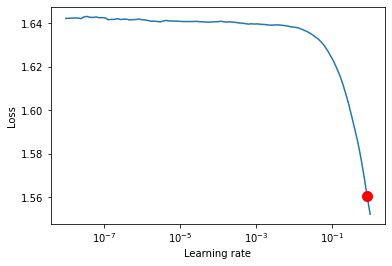

In [19]:
%matplotlib inline
# Results can be found in
lr_finder["lr_find"].results

# Plot with
fig = lr_finder["lr_find"].plot(suggest=True)
fig.show()

In [20]:
# train
model = npClassificator.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name            | Type        | Params
-------------------------------------------------
0  | resnet          | Sequential  | 2.8 M 
1  | dropout_reg     | Dropout     | 0     
2  | fc1_reg         | Linear      | 10.0 M
3  | fc2_reg         | Linear      | 131 K 
4  | batch_norm_reg  | BatchNorm1d | 1.0 K 
5  | fc3_reg         | Linear      | 2.3 K 
6  | dropout_line    | Dropout     | 0     
7  | fc1_line        | Linear      | 10.0 M
8  | fc2_line        | Linear      | 131 K 
9  | batch_norm_line | BatchNorm1d | 1.0 K 
10 | fc3_line        | Linear      | 771   
-------------------------------------------------
23.0 M    Trainable params
0         Non-trainable params
23.0 M    Total params
91.898    Total estimated model params size (MB)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /mnt/store/nomeroff-net/train/lightning_logs/version_108/checkpoints/epoch=49-step=28149.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc_line': 0.9986940026283264,
 'test_acc_reg': 0.9966750144958496,
 'test_accuracy': 0.9976844787597656,
 'test_loss': 0.9644792675971985}
--------------------------------------------------------------------------------


In [21]:
npClassificator.prepare(PATH_TO_DATASET, verbose=1)

START PREPARING
DATA PREPARED


In [22]:
npClassificator.test()

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc_line': 0.9986940026283264,
 'test_acc_reg': 0.9966750144958496,
 'test_accuracy': 0.9976844787597656,
 'test_loss': 0.9644792675971985}
--------------------------------------------------------------------------------


[{'test_loss': 0.9644792675971985,
  'test_accuracy': 0.9976844787597656,
  'test_acc_reg': 0.9966750144958496,
  'test_acc_line': 0.9986940026283264}]

In [23]:
npClassificator.save(RESULT_PATH)

model save to /mnt/store/nomeroff-net/./data/models/numberplate_options_2021_12_16_uacustom_pytorch_lightning.ckpt


# Classification Report

In [24]:
npClassificator.load(RESULT_PATH)

NPOptionsNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [26]:
from nomeroff_net.data_modules.data_loaders import ImgGenerator
from sklearn.metrics import classification_report
import torch

def options_classification_report(npClassificator, 
                                  path_dir=os.path.join(PATH_TO_REG_CUSTOM_DATASET, "test"), 
                                  mode_torch="gpu"):
    imageGenerator = ImgGenerator(
        path_dir,
        npClassificator.width,
        npClassificator.height,
        npClassificator.batch_size,
        [len(npClassificator.class_region), len(npClassificator.count_lines)])
    imageGenerator.build_data()
    gen = imageGenerator.path_generator()
    
    out_idx_reg_all = []
    out_idx_line_all = []
    label_idx_reg_all = []
    label_idx_line_all = []
    for i, (img_paths, inputs, labels) in enumerate(gen, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs = torch.from_numpy(inputs)
        if mode_torch == "gpu":
            inputs = inputs.cuda()
            npClassificator.model.cuda()
        with torch.no_grad():
            outputs = npClassificator.model(inputs)
        label_reg = torch.from_numpy(labels[0])
        label_cnt = torch.from_numpy(labels[1])
        if mode_torch == "gpu":
            label_reg = label_reg.cuda()
            label_cnt = label_cnt.cuda()
        
        out_idx_reg = torch.max(outputs[0], 1)[1].cpu().numpy()
        out_idx_line = torch.max(outputs[1], 1)[1].cpu().numpy()
        
        label_idx_reg = torch.max(label_reg, 1)[1].cpu().numpy()
        label_idx_line = torch.max(label_cnt, 1)[1].cpu().numpy()
        
        out_idx_reg_all.extend(out_idx_reg)
        out_idx_line_all.extend(out_idx_line)
        label_idx_reg_all.extend(label_idx_reg)
        label_idx_line_all.extend(label_idx_line)
    #print("out_idx_reg_all", out_idx_reg_all)
    print("\n\nclass region classification report:")
    print(classification_report(label_idx_reg_all, 
                                out_idx_reg_all, 
                                target_names=npClassificator.class_region))
    print("\n\ncount lines classification report:")
    print(classification_report(label_idx_line_all, 
                                out_idx_line_all, 
                                target_names=npClassificator.count_lines))

In [27]:
options_classification_report(npClassificator)



class region classification report:
                 precision    recall  f1-score   support

     eu-ua-2015       1.00      1.00      1.00       978
     eu-ua-2004       1.00      1.00      1.00       930
     eu-ua-1995       1.00      1.00      1.00       910
             eu       1.00      0.99      1.00       985
     xx-transit       1.00      1.00      1.00       411
eu-ua-ordlo-dpr       1.00      1.00      1.00        44
eu-ua-ordlo-lpr       1.00      1.00      1.00        26
             ge       0.99      1.00      0.99       373
             su       0.99      1.00      0.99       271

       accuracy                           1.00      4928
      macro avg       1.00      1.00      1.00      4928
   weighted avg       1.00      1.00      1.00      4928



count lines classification report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4775
           2       0.94      1.00      0.97        15
           3      

# Fine-tuning regions

In [ ]:
# npClassificator.train_regions = True
# npClassificator.train_count_lines = False
# npClassificator.epochs = 20

In [ ]:
# npClassificator.prepare(PATH_TO_REG_CUSTOM_DATASET, verbose=1, num_workers=24)

In [ ]:
# npClassificator.load(RESULT_PATH)

In [ ]:
# # train
# model = npClassificator.train()

In [ ]:
# npClassificator.prepare(PATH_TO_DATASET, verbose=1)
# npClassificator.test()

In [ ]:
# npClassificator.save(RESULT_PATH)

In [ ]:
# options_classification_report(npClassificator, path_dir=os.path.join(PATH_TO_REG_CUSTOM_DATASET, "test"))

# Fine-tuning regions

In [ ]:
# npClassificator.train_regions = False
# npClassificator.train_count_lines = True
# npClassificator.epochs = 20

In [ ]:
# npClassificator.prepare(PATH_TO_LINE_CUSTOM_DATASET, verbose=1, num_workers=24)

In [ ]:
# npClassificator.load(RESULT_PATH)

In [ ]:
# # train
# model = npClassificator.train()

In [ ]:
# npClassificator.prepare(PATH_TO_DATASET, verbose=1)
# npClassificator.test()

In [ ]:
# npClassificator.save(RESULT_PATH)

In [ ]:
# options_classification_report(npClassificator, path_dir=os.path.join(PATH_TO_LINE_CUSTOM_DATASET, "test"))

# Check small accuracy images

In [13]:
npClassificator.load(RESULT_PATH)

NPOptionsNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [14]:
%matplotlib inline

In [15]:
from nomeroff_net.data_modules.data_loaders import ImgGenerator
import torch
import json
import cv2
import matplotlib.pyplot as plt

def show_img(img_path):
    img = cv2.imread(img_path)
    img = img[..., ::-1]
    plt.imshow(img)
    plt.show()

def mark_for_moderation(p):
    json_filepath = p.replace('/img/','/ann/').replace('.png','.json')
    item_data = json.load(open(json_filepath, 'r'))
    if not item_data['moderation']:
        item_data['moderation'] = { "moderatedBy": "dimabendera" }
    item_data['moderation']["isModerated"] = 0
    with open(json_filepath, "w") as json_file:
        json.dump(item_data, json_file)
    
    
def small_acc(npClassificator, 
              path_dir=os.path.join(PATH_TO_TMP_CUSTOM_DATASET, "test"), 
              mode_torch="gpu", 
              min_acc=0.75):
    imageGenerator = ImgGenerator(
        path_dir,
        npClassificator.width,
        npClassificator.height,
        npClassificator.batch_size,
        [len(npClassificator.class_region), len(npClassificator.count_lines)])
    print("start imageGenerator build")
    imageGenerator.build_data()
    print("end imageGenerator build")
    gen = imageGenerator.path_generator()

# (npClassificator, 
#               path_dir=os.path.join(PATH_TO_DATASET, "test"), 
#               mode_torch="gpu", 
#               min_acc=0.75):
#     imageGenerator = ImgGenerator(
#         path_dir,
#         npClassificator.width,
#         npClassificator.height,
#         npClassificator.batch_size,
#         [len(npClassificator.class_region), len(npClassificator.count_lines)])
#     print("start imageGenerator build")
#     imageGenerator.build_data()
#     print("end imageGenerator build")
#     gen = imageGenerator.path_generator()
    cnt = 0
    cnt_all = 0
    for i, (img_paths, inputs, labels) in enumerate(gen, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs = torch.from_numpy(inputs)
        if mode_torch == "gpu":
            inputs = inputs.cuda()
        outputs = npClassificator.model(inputs)
        label_reg = torch.from_numpy(labels[0])
        label_cnt = torch.from_numpy(labels[1])
        if mode_torch == "gpu":
            label_reg = label_reg.cuda()
            label_cnt = label_cnt.cuda()
        out_idx_reg = torch.max(outputs[0], 1)[1].cpu().numpy()
        out_idx_line = torch.max(outputs[1], 1)[1].cpu().numpy()
        
        label_idx_reg = torch.max(label_reg, 1)[1].cpu().numpy()
        label_idx_line = torch.max(label_cnt, 1)[1].cpu().numpy()
        
        cnt_all += 1
        # check reg
        for o, l, p, tens in zip(out_idx_reg, label_idx_reg, img_paths, outputs[0]):
            if o != l:
                print("[WRONG REGION PREDICTED] pred {}[{}] -> {}[{}] source: {}".format(o,npClassificator.class_region[o], l, npClassificator.class_region[l], p))
                mark_for_moderation(p)
                show_img(p)
                cnt += 1
    print("Wrong detection: {} numberplates of {}".format(cnt, cnt_all))
#             elif tens[l] < min_acc:
#                 print("[SMALL ACC REGION PREDICTED]  pred", o, l, tens[l], p)
#                 show_img(p)
        # check line
#         for o, l, p, tens in zip(out_idx_line, label_idx_line, img_paths, outputs[1]):
#             if o != l:
#                 print("[WRONG LINE PREDICTED]  pred", o, l, p)
#                 show_img(p)
#             elif tens[l] < min_acc:
#                 print("[SMALL ACC LINE PREDICTED]  pred", o, l, tens[l], p)
#                 show_img(p)
    

In [20]:
small_acc(npClassificator, os.path.join(PATH_TO_TMP_CUSTOM_DATASET, "test"))

FileNotFoundError: [Errno 2] No such file or directory: '/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-24_custom/test/img'

start imageGenerator build
end imageGenerator build
[WRONG REGION PREDICTED] pred 0[eu-ua-2015] -> 1[eu-ua-2004] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-24_custom/train/img/mpCBMaVYvSwXhHnDgc9Px260K8Od5yblsTqoAWJI41L3ZifFuN.png


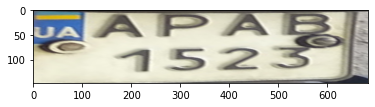

[WRONG REGION PREDICTED] pred 1[eu-ua-2004] -> 0[eu-ua-2015] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-24_custom/train/img/eu-ua-2015_298495478_0.png


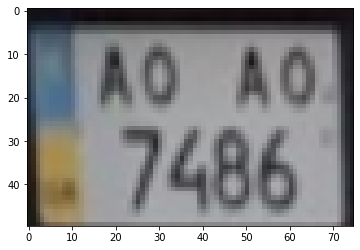

[WRONG REGION PREDICTED] pred 7[ge] -> 3[eu] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-24_custom/train/img/259961471.png


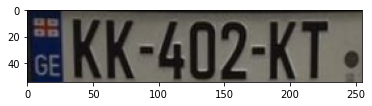

[WRONG REGION PREDICTED] pred 7[ge] -> 3[eu] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-24_custom/train/img/260585120.png


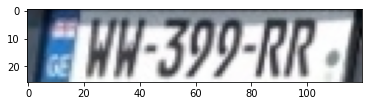

[WRONG REGION PREDICTED] pred 7[ge] -> 3[eu] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-24_custom/train/img/aug_1_259961471.png


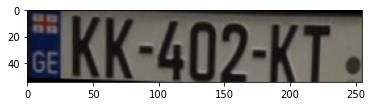

Wrong detection: 5 numberplates of 843


In [18]:
small_acc(npClassificator, os.path.join(PATH_TO_TMP_CUSTOM_DATASET, "train"))

start imageGenerator build
end imageGenerator build
[WRONG REGION PREDICTED] pred 0[eu-ua-2015] -> 1[eu-ua-2004] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-24_custom/val/img/260570779.png


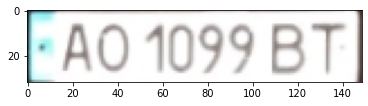

[WRONG REGION PREDICTED] pred 7[ge] -> 3[eu] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-24_custom/val/img/260101079.png


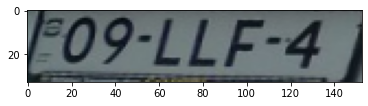

[WRONG REGION PREDICTED] pred 0[eu-ua-2015] -> 3[eu] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-24_custom/val/img/260006625.png


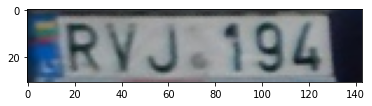

[WRONG REGION PREDICTED] pred 7[ge] -> 3[eu] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-24_custom/val/img/260100920.png


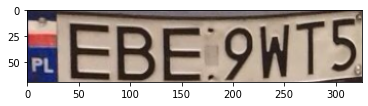

[WRONG REGION PREDICTED] pred 7[ge] -> 0[eu-ua-2015] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-24_custom/val/img/3_eu_ua_2015_257821063_BT3AC.png


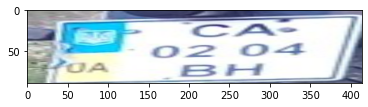

[WRONG REGION PREDICTED] pred 0[eu-ua-2015] -> 3[eu] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-24_custom/val/img/260233314.png


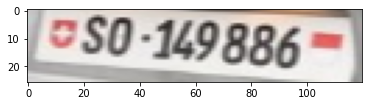

[WRONG REGION PREDICTED] pred 0[eu-ua-2015] -> 8[su] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-24_custom/val/img/121973_Г3983ДЦ_0_1.png


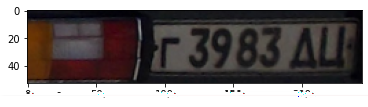

[WRONG REGION PREDICTED] pred 0[eu-ua-2015] -> 8[su] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-24_custom/val/img/143790_З9552ЧН_0_1.png


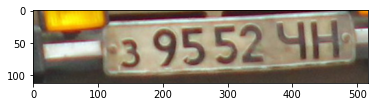

[WRONG REGION PREDICTED] pred 7[ge] -> 3[eu] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-24_custom/val/img/261083373.png


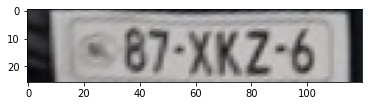

[WRONG REGION PREDICTED] pred 0[eu-ua-2015] -> 3[eu] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-24_custom/val/img/260569405.png


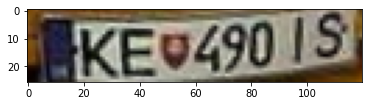

[WRONG REGION PREDICTED] pred 0[eu-ua-2015] -> 3[eu] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-24_custom/val/img/260222261.png


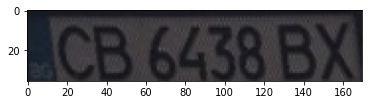

[WRONG REGION PREDICTED] pred 2[eu-ua-1995] -> 8[su] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-24_custom/val/img/88323_Р4396ЯА_0_1.png


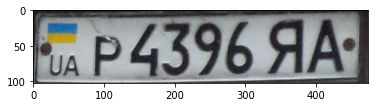

[WRONG REGION PREDICTED] pred 0[eu-ua-2015] -> 3[eu] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-24_custom/val/img/260029850.png


Wrong detection: 13 numberplates of 166


In [19]:
small_acc(npClassificator, os.path.join(PATH_TO_TMP_CUSTOM_DATASET, "val"))